In [4]:
pd.set_option('max_columns' , 100)
pd.set_option('max_colwidth',1000)
%cd "Downloads\"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Ali\Downloads


In [6]:
df = pd.read_csv('car data.csv')
df.head()

<IPython.core.display.Javascript object>

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [9]:
df['Year'].value_counts().sort_values(ascending = False)

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2003     2
2007     2
2004     1
2018     1
Name: Year, dtype: int64

In [10]:
df['Age_of_car'] = df['Year'].apply(lambda x : (int(2020) - int(x)))
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  Age_of_car  
0      Dealer       Manual      0           6  
1      Dealer       Manual      0           7  
2      Dealer       Manual      0           3  
3      Dealer       Manual      0           9  
4      Dealer       Manual      0           6

In [11]:
df.drop(columns = 'Year' , inplace = True)
df.head()

Car_Name  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0     ritz           3.35           5.59       27000    Petrol      Dealer   
1      sx4           4.75           9.54       43000    Diesel      Dealer   
2     ciaz           7.25           9.85        6900    Petrol      Dealer   
3  wagon r           2.85           4.15        5200    Petrol      Dealer   
4    swift           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Age_of_car  
0       Manual      0           6  
1       Manual      0           7  
2       Manual      0           3  
3       Manual      0           9  
4       Manual      0           6

In [12]:
def plot_distibution(col , ax , bins_ = 50):
        pd.DataFrame(df[col]).plot(kind = 'hist' , bins = bins_ , ax = ax) 
         # X-axis label
        ax.set_xlabel(col)
         # Change the x-axis to plain style
        ax.ticklabel_format(style='plain', axis='x')
        print(df[col].describe())

In [13]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))

plot_distibution('Present_Price' , ax=axs[0])
plot_distibution('Selling_Price' , ax = axs[1])
plot_distibution('Kms_Driven' , ax = axs[2])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

count    301.000000
mean       7.628472
std        8.644115
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64


<IPython.core.display.Javascript object>

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64


<IPython.core.display.Javascript object>

count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: Kms_Driven, dtype: float64


In [140]:
import warnings
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(nrows=3, figsize=(18,18))
# Plot histogram
sns.boxplot(df['Present_Price'], ax=axs[0])
sns.boxplot(df['Selling_Price'], ax=axs[1])
sns.boxplot(df['Kms_Driven'], ax=axs[2])
# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
# Set x-axis limit
#axs[0].set_xlim(-200000, 2000000)
#axs[1].set_xlim(-200000, 2000000)
#axs[2].set_xlim(-20000, 100000)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [141]:
df.head()

Car_Name  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0     ritz           3.35           5.59       27000    Petrol      Dealer   
1      sx4           4.75           9.54       43000    Diesel      Dealer   
2     ciaz           7.25           9.85        6900    Petrol      Dealer   
3  wagon r           2.85           4.15        5200    Petrol      Dealer   
4    swift           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Age_of_car  
0       Manual      0           6  
1       Manual      0           7  
2       Manual      0           3  
3       Manual      0           9  
4       Manual      0           6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Selling_Price', ylabel='Car_Name'>

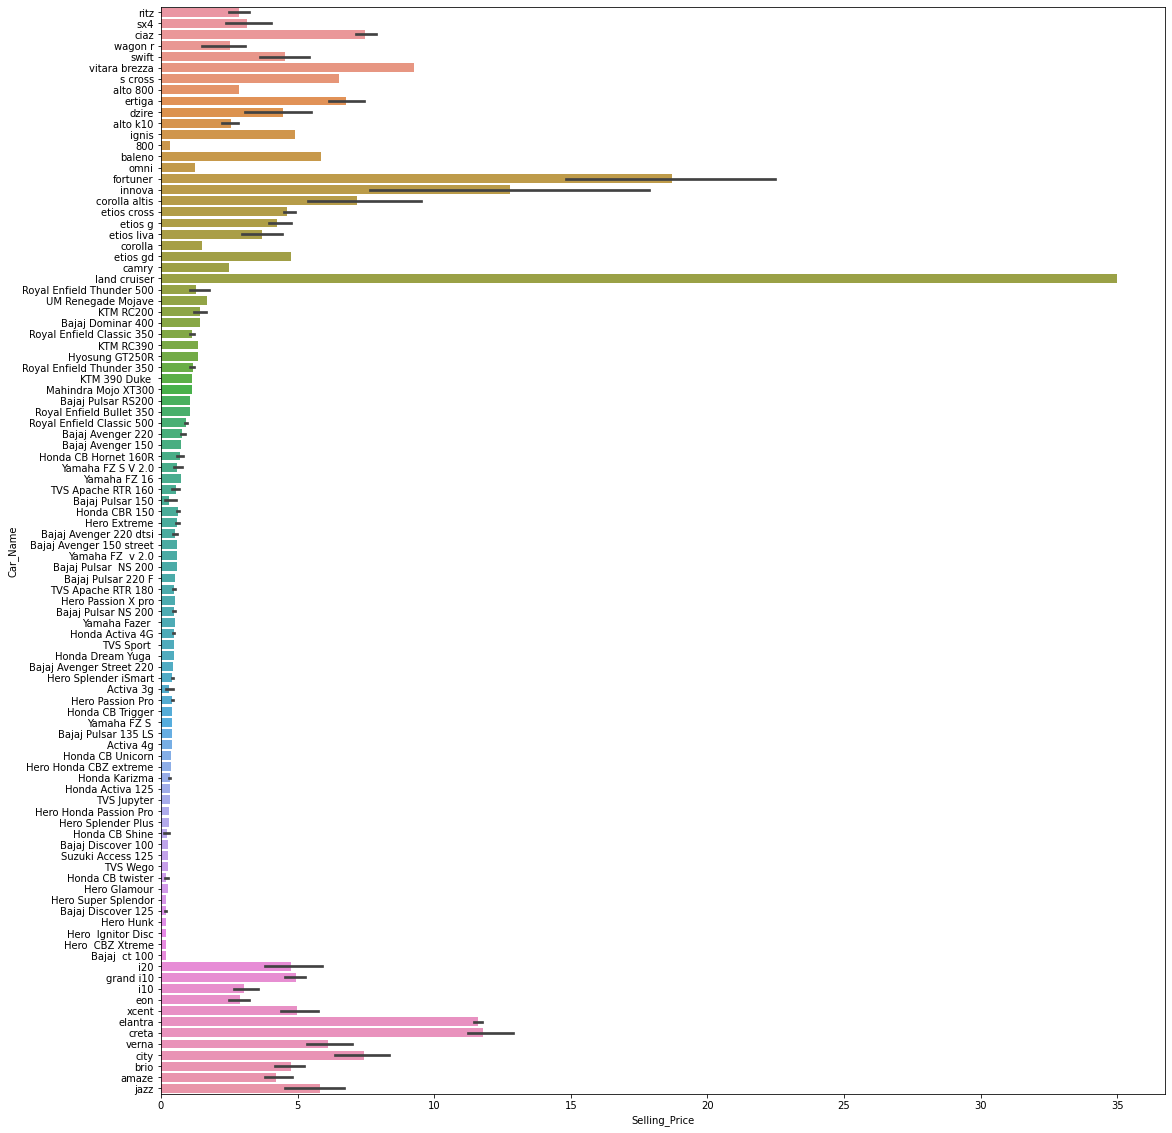

In [142]:
plt.figure(figsize = (18,20))
sns.barplot(y = df['Car_Name'] , x = df['Selling_Price'])

In [143]:
plt.figure(figsize = (18,7))
sns.scatterplot(x = df['Kms_Driven'] , y = df['Selling_Price'])
print(df['Kms_Driven'].corr(df['Selling_Price']))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.029187090674291264


In [144]:
df['Car_Name'].value_counts()

city              26
corolla altis     16
verna             14
fortuner          11
brio              10
                  ..
alto 800           1
corolla            1
baleno             1
TVS Sport          1
Hyosung GT250R     1
Name: Car_Name, Length: 98, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='price_range', ylabel='Selling_Price'>

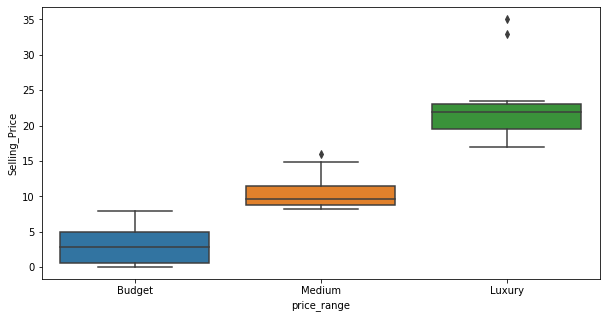

In [145]:
df['price_range'] = df['Selling_Price'].apply(lambda x : 'Budget' if x <= 8 
                                             else( 'Medium' if 8 <= x <= 16 else 'Luxury'))
plt.figure(figsize = (10,5))
sns.boxplot(x = df['price_range'] , y = df['Selling_Price'])

In [146]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [147]:
df.drop(df[df['Owner'] == int(3)].index , inplace = True)

In [148]:
df.head()

Car_Name  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0     ritz           3.35           5.59       27000    Petrol      Dealer   
1      sx4           4.75           9.54       43000    Diesel      Dealer   
2     ciaz           7.25           9.85        6900    Petrol      Dealer   
3  wagon r           2.85           4.15        5200    Petrol      Dealer   
4    swift           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Age_of_car price_range  
0       Manual      0           6      Budget  
1       Manual      0           7      Budget  
2       Manual      0           3      Budget  
3       Manual      0           9      Budget  
4       Manual      0           6      Budget

In [149]:
correlation = df.corr()

In [150]:
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
 yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [151]:
Car_Name = pd.get_dummies(df[['Car_Name']] , drop_first = True)
Car_Name

<IPython.core.display.Javascript object>

Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
0                     0                   0                       0   
1                     0                   0                       0   
2                     0                   0                       0   
3                     0                   0                       0   
4                     0                   0                       0   
..                  ...                 ...                     ...   
296                   0                   0                       0   
297                   0                   0                       0   
298                   0                   0                       0   
299                   0                   0                       0   
300                   0                   0                       0   

     Car_Name_Bajaj Avenger 150  Car_Name_Bajaj Avenger 150 street  \
0                             0                                  0   
1                             0                                  0   
2                             0                                  0   
3                             0                                  0   
4                             0                                  0   
..                          ...                                ...   
296                           0                                  0   
297                           0                                  0   
298                           0                                  0   
299                           0                                  0   
300                           0                                  0   

     Car_Name_Bajaj Avenger 220  Car_Name_Bajaj Avenger 220 dtsi  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                0   
..                          ...                              ...   
296                           0                                0   
297                           0                                0   
298                           0                                0   
299                           0                                0   
300                           0                                0   

     Car_Name_Bajaj Avenger Street 220  Car_Name_Bajaj Discover 100  \
0                                    0                            0   
1                                    0                            0   
2                                    0                            0   
3                                    0                            0   
4                                    0                            0   
..                                 ...                          ...   
296                                  0                            0   
297                                  0                            0   
298                                  0                            0   
299                                  0                            0   
300                                  0                            0   

     Car_Name_Bajaj Discover 125  Car_Name_Bajaj Dominar 400  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
..                           ...                         ...   
296                            0                           0   
297                            0                           0   
298                            0                           0   
2

In [152]:
Seller_Type = pd.get_dummies(df[['Seller_Type']])
Seller_Type

<IPython.core.display.Javascript object>

Seller_Type_Dealer  Seller_Type_Individual
0                     1                       0
1                     1                       0
2                     1                       0
3                     1                       0
4                     1                       0
..                  ...                     ...
296                   1                       0
297                   1                       0
298                   1                       0
299                   1                       0
300                   1                       0

[300 rows x 2 columns]

In [153]:
Fuel_Type = pd.get_dummies(df[['Fuel_Type']])
Fuel_Type

<IPython.core.display.Javascript object>

Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol
0                0                 0                 1
1                0                 1                 0
2                0                 0                 1
3                0                 0                 1
4                0                 1                 0
..             ...               ...               ...
296              0                 1                 0
297              0                 0                 1
298              0                 0                 1
299              0                 1                 0
300              0                 0                 1

[300 rows x 3 columns]

In [154]:
Transmission = pd.get_dummies(df[['Transmission']])
Transmission

<IPython.core.display.Javascript object>

Transmission_Automatic  Transmission_Manual
0                         0                    1
1                         0                    1
2                         0                    1
3                         0                    1
4                         0                    1
..                      ...                  ...
296                       0                    1
297                       0                    1
298                       0                    1
299                       0                    1
300                       0                    1

[300 rows x 2 columns]

In [155]:
price_range = pd.get_dummies(df[['price_range']])
price_range

<IPython.core.display.Javascript object>

price_range_Budget  price_range_Luxury  price_range_Medium
0                     1                   0                   0
1                     1                   0                   0
2                     1                   0                   0
3                     1                   0                   0
4                     1                   0                   0
..                  ...                 ...                 ...
296                   0                   0                   1
297                   1                   0                   0
298                   1                   0                   0
299                   0                   0                   1
300                   1                   0                   0

[300 rows x 3 columns]

In [156]:
df.head()

Car_Name  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0     ritz           3.35           5.59       27000    Petrol      Dealer   
1      sx4           4.75           9.54       43000    Diesel      Dealer   
2     ciaz           7.25           9.85        6900    Petrol      Dealer   
3  wagon r           2.85           4.15        5200    Petrol      Dealer   
4    swift           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Age_of_car price_range  
0       Manual      0           6      Budget  
1       Manual      0           7      Budget  
2       Manual      0           3      Budget  
3       Manual      0           9      Budget  
4       Manual      0           6      Budget

In [157]:
## Log transformation
df.loc[df['Selling_Price'] < 0 , "Selling_Price"] = 0
df.loc[df['Present_Price'] < 0 , "Present_Price"] = 0
df.loc[df['Kms_Driven'] < 0 , "Kms_Driven"] = 0
df.loc[df['Age_of_car'] < 0 , "Age_of_car"] = 0

In [158]:
df["Selling_Price"] = np.log10(df["Selling_Price"]+0.01)
df["Present_Price"] = np.log10(df["Present_Price"]+0.01)
df["Kms_Driven"] = np.log10(df["Kms_Driven"]+1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [159]:
fig, axs = plt.subplots(nrows=3, figsize=(18,25))
sns.distplot(df['Selling_Price'], ax=axs[0])
sns.distplot(df['Present_Price'], ax=axs[1])
sns.distplot(df['Kms_Driven'], ax=axs[2])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Kms_Driven', ylabel='Density'>

In [160]:
l1 = [Car_Name , Transmission , Seller_Type , Fuel_Type , price_range ]
for i in l1:
    df = pd.merge(df, i , left_index=True, right_index=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [161]:
df.head()

Car_Name  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0     ritz       0.526339       0.748188    4.431380    Petrol      Dealer   
1      sx4       0.677607       0.980003    4.633479    Diesel      Dealer   
2     ciaz       0.860937       0.993877    3.838912    Petrol      Dealer   
3  wagon r       0.456366       0.619093    3.716087    Petrol      Dealer   
4    swift       0.663701       0.837588    4.627888    Diesel      Dealer   

  Transmission  Owner  Age_of_car price_range  Car_Name_Activa 3g  \
0       Manual      0           6      Budget                   0   
1       Manual      0           7      Budget                   0   
2       Manual      0           3      Budget                   0   
3       Manual      0           9      Budget                   0   
4       Manual      0           6      Budget                   0   

   Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0                   0                       0                           0   
1                   0                       0                           0   
2                   0                       0                           0   
3                   0                       0                           0   
4                   0                       0                           0   

   Car_Name_Bajaj Avenger 150 street  Car_Name_Bajaj Avenger 220  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  0                           0   

   Car_Name_Bajaj Avenger 220 dtsi  Car_Name_Bajaj Avenger Street 220  \
0                                0                                  0   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   

   Car_Name_Bajaj Discover 100  Car_Name_Bajaj Discover 125  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   Car_Name_Bajaj Dominar 400  Car_Name_Bajaj Pulsar  NS 200  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Car_Name_Bajaj Pulsar 135 LS  Car_Name_Bajaj Pulsar 150  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Car_Name_Bajaj Pulsar 220 F  Car_Name_Bajaj Pulsar NS 200  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   Car_Name_Bajaj Pulsar RS200  Car_Name_Hero  CBZ Xtreme  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0           

In [162]:
df.drop(columns = ["Car_Name" , "Transmission" , "Seller_Type" , "Fuel_Type" , "price_range"] , inplace = True)
df.head()

Selling_Price  Present_Price  Kms_Driven  Owner  Age_of_car  \
0       0.526339       0.748188    4.431380      0           6   
1       0.677607       0.980003    4.633479      0           7   
2       0.860937       0.993877    3.838912      0           3   
3       0.456366       0.619093    3.716087      0           9   
4       0.663701       0.837588    4.627888      0           6   

   Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
0                   0                   0                       0   
1                   0                   0                       0   
2                   0                   0                       0   
3                   0                   0                       0   
4                   0                   0                       0   

   Car_Name_Bajaj Avenger 150  Car_Name_Bajaj Avenger 150 street  \
0                           0                                  0   
1                           0                                  0   
2                           0                                  0   
3                           0                                  0   
4                           0                                  0   

   Car_Name_Bajaj Avenger 220  Car_Name_Bajaj Avenger 220 dtsi  \
0                           0                                0   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   

   Car_Name_Bajaj Avenger Street 220  Car_Name_Bajaj Discover 100  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            0   
3                                  0                            0   
4                                  0                            0   

   Car_Name_Bajaj Discover 125  Car_Name_Bajaj Dominar 400  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   Car_Name_Bajaj Pulsar  NS 200  Car_Name_Bajaj Pulsar 135 LS  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   Car_Name_Bajaj Pulsar 150  Car_Name_Bajaj Pulsar 220 F  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   Car_Name_Bajaj Pulsar NS 200  Car_Name_Bajaj Pulsar RS200  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Car_Name_Hero  CBZ Xtreme  Car_Name_Hero  Ignitor Disc  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   Car_Name_Hero Extreme  Car_Name_Hero Glamour  \
0                      0      

In [164]:
df.to_csv('ANN_ready.csv')